## Lesson-01

In [2]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [2]:
another_grammar = """
#
"""

In [3]:
import random

In [4]:
def adj():  return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [5]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [9]:
adj_star()

''

## But the question is ? 

如果我们更换了语法，会发现所有写过的程序，都要重新写。:( 

In [10]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [11]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [20]:
grammar = create_grammar(adj_grammar)

In [21]:
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [22]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [23]:
example_grammar = create_grammar(simple_grammar)

In [24]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [25]:
generate(gram=example_grammar, target='sentence')

'一个好看的好看的好看的好看的小猫坐在一个桌子'

In [26]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [27]:
for i in range(20):
    print(generate(gram=create_grammar(host, split='='), target='host'))

你好我是25号,请问你要打猎吗？
女士,您好我是18号,请问你要赌博吗？
女士,您好我是34号,请问你要赌博吗？
小朋友,您好我是425257号,您需要打猎吗？
小朋友,您好我是1号,请问你要打牌吗？
您好我是44号,请问你要喝酒吗？
女士,你好我是5号,您需要赌博吗？
你好我是6号,您需要赌博吗？
女士,您好我是945号,请问你要打猎吗？
先生,您好我是811号,您需要打猎吗？
你好我是6号,请问你要打猎吗？
您好我是5号,您需要打猎吗？
你好我是7283号,请问你要赌博吗？
女士,你好我是8286号,您需要赌博吗？
您好我是25号,请问你要打牌吗？
你好我是69号,您需要打牌吗？
你好我是7号,您需要喝酒吗？
先生,您好我是895号,请问你要喝酒吗？
你好我是27号,请问你要打猎吗？
女士,您好我是14462号,请问你要打猎吗？


希望能够生成最合理的一句话？ 

## Data Driven

我们的目标是，希望能做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写。Generalization.

AI? 如何能自动化解决问题，我们找到一个方法之后，输入变了，我们的这个方法，不用变。

In [41]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [42]:
print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

while(info_lib>=database_info_lib_database_name){/Nif(lib_9_2<=lib_database_4_3_1){/Nif(lib_infostudent){/Nif(info_student_8<info_name_9_7){/Nlib_database=name/N}/N}/N}/N}


In [43]:
def pretty_print(line):
    # utility tool function
    lines = line.split('/N')
    
    code_lines = []
    
    for i, sen in enumerate(lines):
        if i < len(lines) / 2: 
            #print()
            code_lines.append(i * "  " + sen)
        else:
            code_lines.append((len(lines) - i) * " " + sen)
    
    return code_lines

In [44]:
generated_programming = []

for i in range(20):
    generated_programming += pretty_print(generate(gram=create_grammar(simpel_programming, split='=>'), target='programming'))

In [45]:
for line in generated_programming:
    print(line)

if(database_0<=database){
  if(database<=lib_lib){
    student_database=lib_lib
      }else{
        student_name_student_database_6=database_name_6_9
          }
            }else{
              if(student<=lib_lib){
                database_lib_name=database_lib
                  }else{
         if(info_student>=lib_info_lib_5_3_9_8){
        if(name_infoinfo_database_name_0){
       name_student_info_lib_student_5_0_9_1=lib
      }else{
     lib_database_7_6=lib_database
    }
   }
  }
 }
database_info_student=database_database
if(student_8_4_1<=info){
  student_lib_info_lib=name_2_2_4_7_6_6_3_1_4
    }else{
      if(name_info_8_5==lib_2_0_5){
        if(info_nameinfo_9_2_8){
          if(info<student_info_lib_name_lib){
     student=name_4_9
    }
   }
  }
 }
if(student_database_student_namelib){
  if(name_lib_database_student_4_9>=database_lib){
    if(lib<lib_name_8){
      database=name
        }else{
          student_3_8_3_2=name_3_8
            }
              }
             

# Language Model

$$ language\_model(String) = Probability(String) \in (0, 1) $$

$$ Pro(w_1 w_2 w_3 w_4) = Pr(w_1 | w_2 w_3 w_ 4) * P(w2 | w_3 w_4) * Pr(w_3 | w_4) * Pr(w_4)$$ 

$$ Pro(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 ) * P(w2 | w_3 ) * Pr(w_3 | w_4) * Pr(w_4)$$ 

how to get $ Pr(w1 | w2 w3 w4) $ ?

In [1]:
import random

In [2]:
random.choice(range(100))

64

In [3]:
filename = 'E:/nlp/lecture_material/lecture1/sqlResult_1558435.csv'

In [4]:
import pandas as pd

In [5]:
content = pd.read_csv(filename, encoding='gb18030')

In [6]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [7]:
articles = content['content'].tolist()
articles

\r\n众所周知，作为一名演员，就意味着长期性的在外拍戏工作，而相对与家庭在一起的时间就会减少。记者也把“如何平衡工作与家庭”这个万年难题问向了马雅舒。她坦言道：“其实我在工作和孩子之间是完全平衡不了的。”只能说做到在任何一方面都全力以赴。马雅舒称演戏是最爱的追求，但是孩子更重要的是一辈子的责任。但是如果平衡不了的话，孩子永远是在第一位的。?\r\n马雅舒一家\r\n“毫无保留向大众展示自我，就可以承担压力”\r\n节目播出后，在马雅舒对待孩子的“过度敏感担心”这一点上，遭到了网友们的吐槽。马雅舒在面对这些舆论的压力时，坦言道：“我愿意把我的缺点和我做的不好的地方去毫无保留的表现出来，我就可以接受大家对我的质疑和评论。”只要不是无关的谩骂，而是认真看节目的观众留下的中肯的评价与建议，马雅舒还会反思，思考自己的不足，自己对待孩子的方式是不是出了问题。“我会冷静下来去分析、去想，会根据我自己当时的拍摄状况去总结、去改变。”\r\n“努力向超人妈妈看齐”\r\n在访问中记者提出：“你理解的超人妈妈是什么标准，认为自己达到了吗？”时，马雅舒表示，“超人妈妈”这个标准自己现在还是达不到，但她会努力地向“超人妈妈”看齐。参加完这个节目，马雅舒最大的一点改变要属她的育儿方式。由以前的“无限溺爱”变得比较能“放开手”，让孩子有更多的机会去接触新鲜的事物。\r\n',
 '\u3000\u3000人民网(行情603000,诊股)讯 据法新社孟加拉国首都达卡20日电， 孟加拉国当局当天说，过去48小时内至少有22人遭闪电击中而死亡。孟加拉国1周前才因季风降雨引发多起致命泥石流意外。\r\n\u3000\u3000灾难处理部门主管阿迈德告诉法新社，多个风暴前天和昨天横扫孟加拉期间，这22人遭雷击身亡。死者包括1对夫妻和他们的年轻女儿，他们当时在花生田里工作，不幸遭闪电劈中。\r\n\u3000\u3000孟加拉国每年都有数以百计的民众遭闪电击中而亡，专家说气候变迁助长了这个问题。专家也将原因归咎到森林砍乏以及棕榈树等较高树种的减少，它们的作用相当于避雷针。\r\n\u3000\u3000孟加拉国去年遭雷击而死的官方统计数字高达200人，5月份中的一天就有82人罹难。专家则说，由于许多死亡案件未获通报，真正的死亡人数可能会比官方数字高出更多。一独立监测机构则说，2016年有349人死于雷击

In [6]:
len(articles)

89611

invalid

In [5]:
import re

In [6]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [10]:
from collections import Counter

In [30]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

In [32]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [17]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [7]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [8]:
len(articles_clean)

89611

In [36]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [10]:
!ls

Lesson-01.ipynb               article_9k.txt
Math-Foundation-02.ipynb      assignments
Math-Foundation-Part-01.ipynb readmd.md


In [12]:
def cut(string): return list(jieba.cut(string))

In [1]:
import jieba

In [2]:
def cut(string): return list(jieba.cut(string))

In [3]:
TOKEN = []

In [5]:
for i, line in enumerate((open('article_9k.txt',encoding='utf-8'))):
    if i % 100 == 0: print(i)
    
    # replace 10000 with a big number when you do your homework. 
    
    if i > 10000: break    
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ddyuqing\AppData\Local\Temp\jieba.cache
0
Loading model cost 1.243 seconds.
Prefix dict has been built succesfully.
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [8]:
from functools import reduce

In [10]:
from operator import add, mul

In [11]:
reduce(add, [1, 2, 3, 4, 5, 8])

23

In [ ]:
[1, 2, 3] + [3, 43, 5]

In [12]:
TOKEN[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '，', '看', '了']

In [7]:
from collections import Counter

In [10]:
words_count = Counter(TOKEN)
words_count.most_common(10)

[('，', 20278),
 ('的', 15355),
 ('。', 10792),
 ('\n', 10001),
 ('了', 5825),
 (' ', 4143),
 ('是', 3711),
 ('！', 3379),
 ('我', 2533),
 ('都', 2139)]

In [58]:
words_count.most_common(100)

[('的', 184244),
 ('在', 47370),
 ('了', 36722),
 ('和', 30809),
 ('是', 30283),
 ('月', 18711),
 ('也', 15995),
 ('年', 15971),
 ('有', 14714),
 ('为', 14448),
 ('等', 14340),
 ('将', 14060),
 ('对', 13074),
 ('与', 12568),
 ('日', 12322),
 ('中', 11117),
 ('中国', 11036),
 ('6', 10477),
 ('上', 10192),
 ('不', 10027),
 ('\n', 10001),
 ('他', 9530),
 ('都', 9447),
 ('发展', 8795),
 ('企业', 8584),
 ('就', 8537),
 ('到', 8338),
 ('市场', 8095),
 ('但', 7729),
 ('这', 7658),
 ('被', 7575),
 ('从', 7513),
 ('并', 7412),
 ('人', 7339),
 ('后', 7084),
 ('公司', 6915),
 ('一个', 6772),
 ('说', 6703),
 ('新', 6467),
 ('表示', 6309),
 ('要', 6276),
 ('还', 6245),
 ('会', 6179),
 ('个', 6176),
 ('我', 6141),
 ('而', 6090),
 ('进行', 5802),
 ('我们', 5742),
 ('记者', 5734),
 ('以', 5615),
 ('5', 5569),
 ('工作', 5135),
 ('没有', 5000),
 ('美国', 4840),
 ('下', 4741),
 ('更', 4739),
 ('通过', 4720),
 ('大', 4704),
 ('让', 4701),
 ('可以', 4681),
 ('经济', 4670),
 ('时', 4654),
 ('目前', 4645),
 ('国家', 4628),
 ('项目', 4538),
 ('问题', 4422),
 ('创新', 4416),
 ('多', 4410),
 ('已

In [65]:
frequiences = [f for w, f in words_count.most_common(100)]

In [60]:
x = [i for i in range(100)]

In [61]:
%matplotlib inline

In [63]:
import matplotlib.pyplot as plt

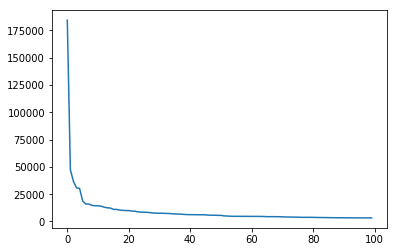

In [66]:
plt.plot(x, frequiences)

In [67]:
import numpy as np

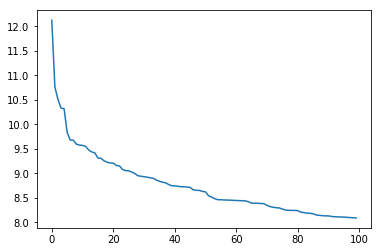

In [68]:
plt.plot(x, np.log(frequiences))

In [69]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [73]:
prob_1('我们')

0.001554473157589251

In [74]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [78]:
TOKEN = [str(t) for t in TOKEN]

In [81]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [83]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [84]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [85]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [96]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [99]:
prob_2('我们', '在')

4.683455274626447e-05

In [97]:
prob_2('在', '吃饭')

2.707199580708929e-07

In [98]:
prob_2('去', '吃饭')

2.707199580708929e-07

In [103]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [104]:
get_probablity('小明今天抽奖抽到一台苹果手机')

6.298565169317442e-39

In [105]:
get_probablity('小明今天抽奖抽到一架波音飞机')

3.936603230823401e-40

In [106]:
get_probablity('洋葱奶昔来一杯')

1.9840875058382383e-20

In [107]:
get_probablity('养乐多绿来一杯')

7.3289295697906e-14

In [121]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个好看的女人坐在这个好看的好看的小小的小猫 with Prb: 2.209525756057602e-68
sentence: 一个好看的好看的小小的蓝色的小猫看见一个篮球 with Prb: 1.1082260845429978e-69
sentence: 一个女人看着一个蓝色的小小的篮球 with Prb: 3.4102945970888084e-45
sentence: 一个好看的蓝色的蓝色的蓝色的小猫看见这个好看的小小的桌子 with Prb: 2.5353475300315315e-91
sentence: 这个好看的桌子看着一个桌子 with Prb: 1.7321054215622968e-38
sentence: 这个好看的小猫坐在这个小小的小猫 with Prb: 1.172288767749278e-45
sentence: 一个好看的蓝色的小小的女人听着这个蓝色的篮球 with Prb: 9.072572114810237e-73
sentence: 一个小猫坐在一个小猫 with Prb: 5.371320863895103e-27
sentence: 一个蓝色的蓝色的女人听着一个小小的女人 with Prb: 7.148809602276898e-59
sentence: 这个小猫坐在这个蓝色的好看的好看的小小的女人 with Prb: 5.541130422714989e-70


In [122]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.7051133711305114e-62
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.7051133711305114e-62
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.599536134964894e-32
---- 真是一只好看的小猫 with probility 5.908452950284614e-26
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 8.333167524520602e-19
---- 今晚火锅去吃我 with probility 1.933675511002237e-25
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.9840875058382383e-20
---- 养乐多绿来一杯 with probility 7.3289295697906e-14


## Data Driven